# Audio visualization and other utils

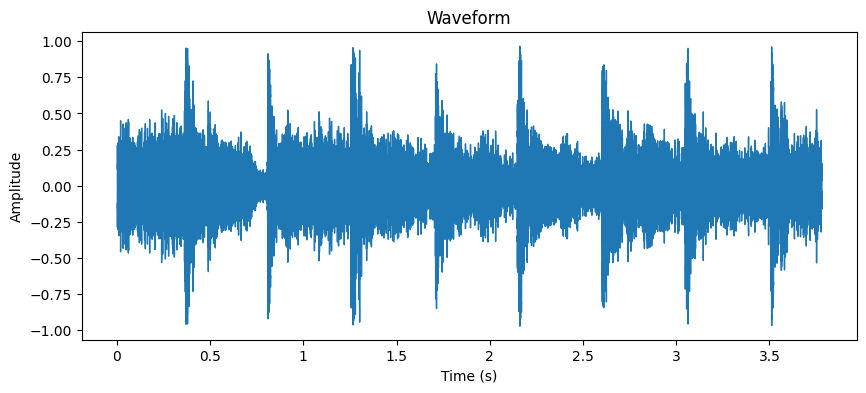

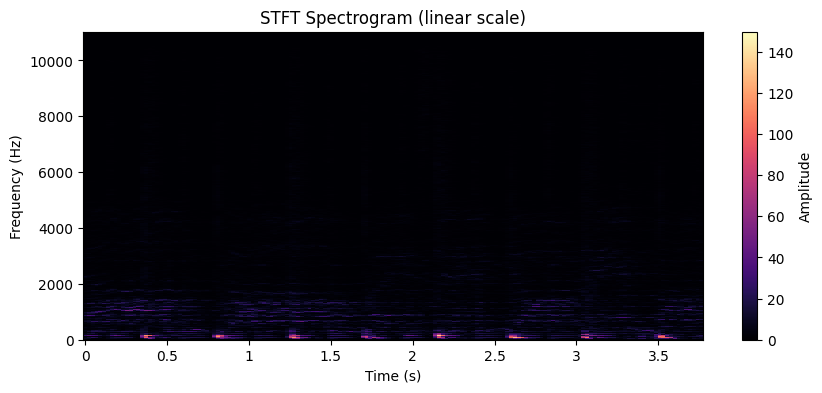

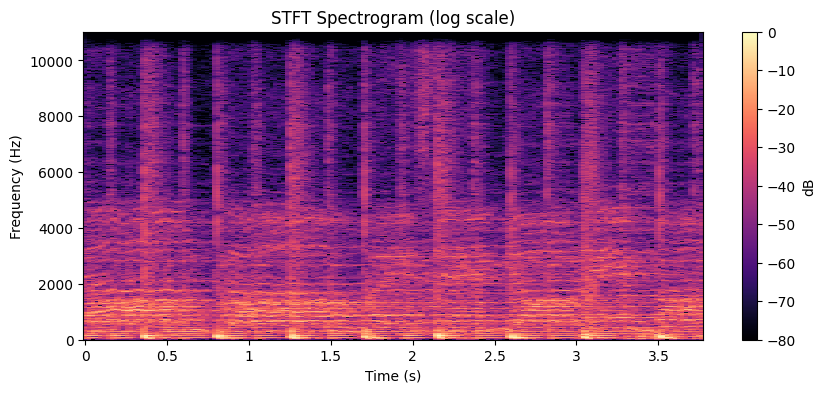

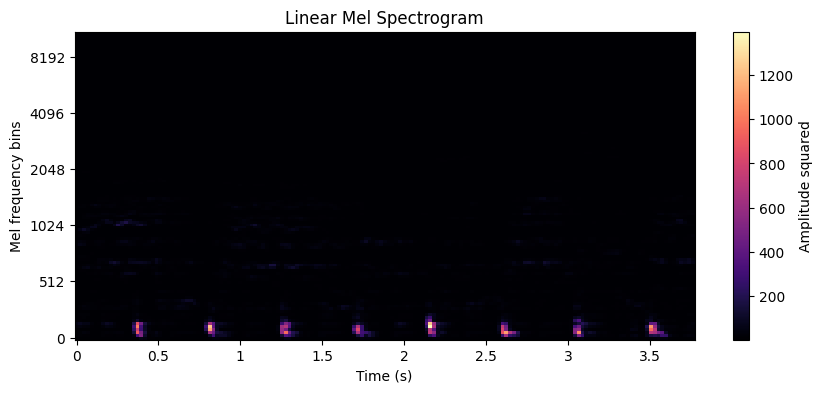

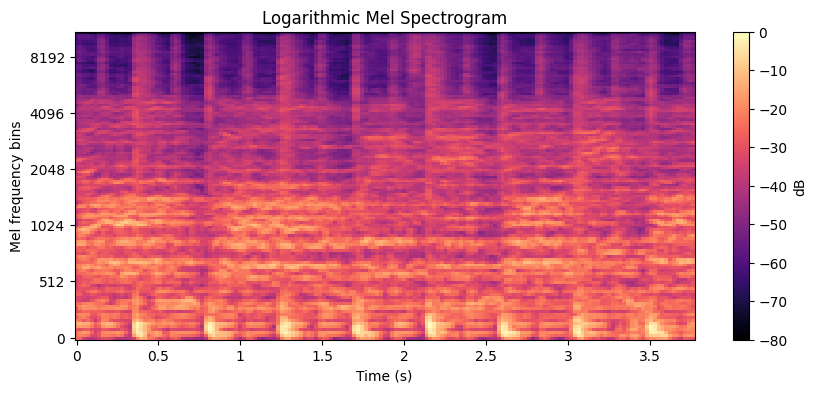

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(r'C:\Users\Articuno\Desktop\TFG-info\data\example.wav')

# Plot the waveform using waveshow
plt.figure(figsize=(10, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Compute STFT and plot
n_fft = 2048
hop_length = 512
ft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

def plot(data, title, sr, x_axis, y_axis, x_label, y_label, colorbar_label):
    plt.figure(figsize=(10, 4))  # Create a new figure for the STFT spectrogram
    librosa.display.specshow(data, sr=sr, x_axis=x_axis, y_axis=y_axis) #fmax=8000
    plt.colorbar(label=colorbar_label) # format='%+2.0f'
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# 1. STFT Spectrogram (linear scale)
plot(ft, 'STFT Spectrogram (linear scale)', sr, 'time', 'linear', 'Time (s)', 'Frequency (Hz)', 'Amplitude')

# 2. STFT Spectrogram (log scale)
ft_dB = librosa.amplitude_to_db(ft, ref=np.max)
plot(ft_dB, 'STFT Spectrogram (log scale)', sr, 'time', 'linear', 'Time (s)', 'Frequency (Hz)', 'dB')

# 3. Mel Spectrogram (linear scale)
mel_sp = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
plot(mel_sp, 'Linear Mel Spectrogram', sr, 'time', 'mel', 'Time (s)', 'Mel frequency bins', 'Amplitude squared')

# 4. Mel Spectrogram (mel scale)
mel_sp_dB = librosa.power_to_db(mel_sp, ref=np.max)

plot(mel_sp_dB, 'Logarithmic Mel Spectrogram', sr, 'time', 'mel', 'Time (s)', 'Mel frequency bins', 'dB')




In [ ]:
%run init_notebook.py

import torch
import torchaudio
import librosa
import numpy as np
import random
from IPython.display import display

from src.dataset import NSynth
from src.utils.audio_utils import *
from src.utils.audio_utils import listen

# 1) Load dataset and pick a sample
dataset = NSynth('testing')

# 3) Define STFT transforms
sample_rate = 16000
n_fft = 1500
hop_length = 250
win_length = n_fft 

stft_transform = torchaudio.transforms.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    power=None,
    onesided=False,  # Make sure we keep the full spectrum (complex-valued)
    center=False
)

transformed = stft_transform(torch.rand(64, 1, 64000))
print("Transformed.shape = ", transformed.shape)

# Define the inverse STFT function (use torchaudio for reconstruction)
istft_transform = torchaudio.transforms.InverseSpectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    onesided=False,  # Make sure we keep the full spectrum (complex-valued)
)

# padding = n_fft / 2
# Height = (n_fft / 2) + 1
# Width = 1 + floor((input_length - n_fft + 2 * padding) / hop_length)

# Select a few random indices for testing
test_indeces = [random.choice(range(len(dataset))) for _ in range(5)]

for i in range(len(test_indeces)):

    waveform, sample_rate, key, _ = dataset[i]
    print(f"Original audio {key}:")
    display(listen(waveform, sample_rate))
    
    with torch.no_grad():

        print(f"Shape of the original waveform: {waveform.shape}")
        # Apply STFT transformation (this gives complex output)
        stft_spec = stft_transform(waveform)  # [1, freq_bins, time_frames]

        print(f"Shape of stft spectogram: {stft_spec.shape}")
        
        # Extract magnitude and phase
        magnitude = stft_spec.abs()  # Magnitude spectrogram
        phase = torch.angle(stft_spec)  # Phase information

        print(f"Shape of magitude: {magnitude.shape}")
        print(f"Shape of phase: {phase.shape}")

    # Reconstruct audio using ISTFT (combine magnitude and phase)
    # Rebuild the complex spectrogram from magnitude and phase
    complex_spec = magnitude * torch.exp(1j * phase)

    # Pass the complex spectrogram to the ISTFT
    reconstructed_waveform = istft_transform(complex_spec)
    print(f"Shape of reconstucted waveform: {reconstructed_waveform.shape}")

    print("Reconstructed audio:")
    display(listen(reconstructed_waveform, sample_rate))


Transformed.shape =  torch.Size([64, 1, 1500, 251])
Original audio bass_synthetic_068-049-025:


Shape of the original waveform: torch.Size([1, 64000])
Shape of stft spectogram: torch.Size([1, 1500, 251])
Shape of magitude: torch.Size([1, 1500, 251])
Shape of phase: torch.Size([1, 1500, 251])
Shape of reconstucted waveform: torch.Size([1, 62500])
Reconstructed audio:


Original audio keyboard_electronic_001-021-127:


Shape of the original waveform: torch.Size([1, 64000])
Shape of stft spectogram: torch.Size([1, 1500, 251])
Shape of magitude: torch.Size([1, 1500, 251])
Shape of phase: torch.Size([1, 1500, 251])
Shape of reconstucted waveform: torch.Size([1, 62500])
Reconstructed audio:


Original audio guitar_acoustic_010-066-100:


Shape of the original waveform: torch.Size([1, 64000])
Shape of stft spectogram: torch.Size([1, 1500, 251])
Shape of magitude: torch.Size([1, 1500, 251])
Shape of phase: torch.Size([1, 1500, 251])
Shape of reconstucted waveform: torch.Size([1, 62500])
Reconstructed audio:


Original audio reed_acoustic_037-068-127:


Shape of the original waveform: torch.Size([1, 64000])
Shape of stft spectogram: torch.Size([1, 1500, 251])
Shape of magitude: torch.Size([1, 1500, 251])
Shape of phase: torch.Size([1, 1500, 251])
Shape of reconstucted waveform: torch.Size([1, 62500])
Reconstructed audio:


Original audio flute_acoustic_002-077-100:


Shape of the original waveform: torch.Size([1, 64000])
Shape of stft spectogram: torch.Size([1, 1500, 251])
Shape of magitude: torch.Size([1, 1500, 251])
Shape of phase: torch.Size([1, 1500, 251])
Shape of reconstucted waveform: torch.Size([1, 62500])
Reconstructed audio:


In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# Using raw string literal for file path
y, sr = librosa.load(r'C:\Users\Articuno\Desktop\TFG-info\data\example.wav')

# Plot the waveform using waveshow
plt.figure(figsize=(10, 4))  # Create a new figure for the waveform
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

# Compute STFT and plot
n_fft = 2048
hop_length = 512
ft = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

def plot(data, title, sr, x_axis, y_axis, x_label, y_label, colorbar_label):
    plt.figure(figsize=(10, 4))  # Create a new figure for the STFT spectrogram
    librosa.display.specshow(data, sr=sr, x_axis=x_axis, y_axis=y_axis) #fmax=8000
    plt.colorbar(label=colorbar_label) # format='%+2.0f'
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# 1. STFT Spectrogram (linear scale)
plot(ft, 'STFT Spectrogram (linear scale)', sr, 'time', 'linear', 'Time (s)', 'Frequency (Hz)', 'Amplitude')

# 2. STFT Spectrogram (log scale)
ft_dB = librosa.amplitude_to_db(ft, ref=np.max)
plot(ft_dB, 'STFT Spectrogram (log scale)', sr, 'time', 'linear', 'Time (s)', 'Frequency (Hz)', 'dB')

# 3. Mel Spectrogram (linear scale)
mel_sp = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length)
plot(mel_sp, 'Linear Mel Spectrogram', sr, 'time', 'mel', 'Time (s)', 'Mel frequency bins', 'Amplitude squared')

# 4. Mel Spectrogram (mel scale)
mel_sp_dB = librosa.power_to_db(mel_sp, ref=np.max)

plot(mel_sp_dB, 'Logarithmic Mel Spectrogram', sr, 'time', 'mel', 'Time (s)', 'Mel frequency bins', 'dB')




In [ ]:
# Compute maximum difference between all testing audios

import librosa
import numpy as np
import os

# Directory containing your audio files
audio_dir = r'C:\Users\Articuno\Desktop\TFG-info\data\testing\audio'

# Initialize an empty list to store raw waveforms
waveform_list = []
audio_files = os.listdir(audio_dir)  # List all files in the directory

max_difference = float('-inf')

# Iterate over all audio files in the directory
for file1 in audio_files:
    for file2 in audio_files:
        file_path1 = os.path.join(audio_dir, file1)
        file_path2 = os.path.join(audio_dir, file2)
            
        # Load the audio file (this is just one file at a time)
        y1, sr1 = librosa.load(file_path1)
        y2, sr2 = librosa.load(file_path2)

        max_difference = max(max_difference, np.linalg.norm(y1 - y2))

print("Max difference is: ", max_difference)

# Max difference turned out to be 240.97852


Max difference is:  240.97852


In [ ]:
# Calculate the minimum and maximum vale of a wave

import librosa
import numpy as np
import os

# Directory containing your audio files
audio_dir = r'C:\Users\Articuno\Desktop\TFG-info\data\training\audio'

# Initialize an empty list to store raw waveforms
waveform_list = []
audio_files = os.listdir(audio_dir)  # List all files in the directory

maxx = float('-inf')
minn = float('inf')

# Iterate over all audio files in the directory
for file in audio_files:
    file_path = os.path.join(audio_dir, file)
            
    # Load the audio file (this is just one file at a time)
    y, sr = librosa.load(file_path)

    maxx = max(maxx, np.max(y))
    minn = min(minn, np.min(y))

print("Min is: ", minn)
print("Max is: ", maxx)

# TESTING
# Min is:  -1.4503907
# Max is:  1.6683576

# TRAINING
# Min is:  -1.8373662
# Max is:  1.83827

# VALIDATION
# Min is:  -1.5130217
# Max is:  1.7309165


Min is:  -1.8373662
Max is:  1.83827
Min is:  -1.5130217
Max is:  1.7309165


In [ ]:
# Calculating min and max with our stft transformations.

import torch
import torchaudio.transforms as T
import librosa
import os

n_fft = 350
hop_length = 80
win_length = n_fft  # Same as n_fft

device = "cuda"
stft = T.Spectrogram(
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    power=None,  # Keep as complex spectrogram (magnitude and phase)
    onesided=False,  # Make sure we keep the full spectrum (complex-valued)
    center=False
).to(device)



# Directory containing your audio files
audio_dir = r'C:\Users\Articuno\Desktop\TFG-info\data\validation\audio'

# Initialize an empty list to store raw waveforms
waveform_list = []
audio_files = os.listdir(audio_dir)  # List all files in the directory

maxx = float('-inf')
minn = float('inf')

# Iterate over all audio files in the directory
for file in audio_files:
    file_path = os.path.join(audio_dir, file)
            
    # Load the audio file (this is just one file at a time)
    y, sr = librosa.load(file_path)
    y = torch.tensor(y, device=device)  # <-- fix here

    stft_angle = torch.angle(y).to(device)
    
    maxx = max(maxx, stft_angle.max().item())
    minn = min(minn, stft_angle.min().item())
    break

print("Min is: ", minn)
print("Max is: ", maxx)

# MAGNITUDE:

# TESTING
# Min is:  0.0
# Max is:  163.86927795410156

# TRAINING
# Min is:  0.0
# Max is:  165.65298461914062

# VALIDATION
# Min is: 0.0
# Max is: 164.83026123046875



Min is:  0.0
Max is:  3.1415927410125732
